In [0]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict, Counter
from scipy.stats.stats import pearsonr

from datetime import datetime

In [0]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [0]:
url = 'https://raw.githubusercontent.com/ZioTrib/dm2proj/master/datatraining.csv'
df = pd.read_csv(url) 

url_test1 = 'https://raw.githubusercontent.com/ZioTrib/dm2proj/master/datatest.csv'
df_test1 =pd.read_csv(url_test1)

url_test2 = 'https://raw.githubusercontent.com/ZioTrib/dm2proj/master/datatest2.csv'
df_test2 =pd.read_csv(url_test2)

# Data preparation

#### Variabile date - datatraining, datatest e datatest1

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [0]:
day = df['date'].dt.day
df['day'] = day

In [0]:
hour = df['date'].dt.hour
df['hour'] = hour

In [0]:
df_test1['date'] = pd.to_datetime(df_test1['date'])

In [0]:
day = df_test1['date'].dt.day
df_test1['day'] = day

In [0]:
hour = df_test1['date'].dt.hour
df_test1['hour'] = hour

In [0]:
df_test2['date'] = pd.to_datetime(df_test2['date'])

In [0]:
day = df_test2['date'].dt.day
df_test2['day'] = day

In [0]:
hour = df_test2['date'].dt.hour
df_test2['hour'] = hour

#### Variabile HumidityRatio - datatraining, datatest e datatest1

In [0]:
humidex_index = df['Temperature'] + 5/9*(0.611*df['Humidity']*(10**(0.03*df['Temperature'])) - 10)

In [0]:
for i in range(len(humidex_index)):
    if humidex_index[i]<27:
        humidex_index[i] = 'Benessere'
    elif humidex_index[i]>=27 and humidex_index[i]<30:
        humidex_index[i] = 'Leggero disagio'
    elif humidex_index[i]>=30 and humidex_index[i]<40:
        humidex_index[i] = 'Disagio'
    elif humidex_index[i]>=40 and humidex_index[i]<55:
        humidex_index[i] = 'Grande disagio'
    else:
        humidex_index[i] = 'Pericolo'
        
print(humidex_index)

0       Pericolo
1       Pericolo
2       Pericolo
3       Pericolo
4       Pericolo
          ...   
8138    Pericolo
8139    Pericolo
8140    Pericolo
8141    Pericolo
8142    Pericolo
Length: 8143, dtype: object


In [0]:
df['Humidex_index'] = humidex_index
df['Humidex_index'].value_counts()

Grande disagio    5316
Pericolo          2189
Disagio            638
Name: Humidex_index, dtype: int64

In [0]:
humidex_index = df_test1['Temperature'] + 5/9*(0.611*df_test1['Humidity']*(10**(0.03*df_test1['Temperature'])) - 10)

In [0]:
for i in range(len(humidex_index)):
    if humidex_index[i]<27:
        humidex_index[i] = 'Benessere'
    elif humidex_index[i]>=27 and humidex_index[i]<30:
        humidex_index[i] = 'Leggero disagio'
    elif humidex_index[i]>=30 and humidex_index[i]<40:
        humidex_index[i] = 'Disagio'
    elif humidex_index[i]>=40 and humidex_index[i]<55:
        humidex_index[i] = 'Grande disagio'
    else:
        humidex_index[i] = 'Pericolo'
        
print(humidex_index)

0       Pericolo
1       Pericolo
2       Pericolo
3       Pericolo
4       Pericolo
          ...   
2660    Pericolo
2661    Pericolo
2662    Pericolo
2663    Pericolo
2664    Pericolo
Length: 2665, dtype: object


In [0]:
df_test1['Humidex_index'] = humidex_index
df_test1['Humidex_index'].value_counts()

Grande disagio    1655
Pericolo          1010
Name: Humidex_index, dtype: int64

In [0]:
humidex_index = df_test2['Temperature'] + 5/9*(0.611*df_test2['Humidity']*(10**(0.03*df_test2['Temperature'])) - 10)

In [0]:
for i in range(len(humidex_index)):
    if humidex_index[i]<27:
        humidex_index[i] = 'Benessere'
    elif humidex_index[i]>=27 and humidex_index[i]<30:
        humidex_index[i] = 'Leggero disagio'
    elif humidex_index[i]>=30 and humidex_index[i]<40:
        humidex_index[i] = 'Disagio'
    elif humidex_index[i]>=40 and humidex_index[i]<55:
        humidex_index[i] = 'Grande disagio'
    else:
        humidex_index[i] = 'Pericolo'
        
print(humidex_index)

0             Pericolo
1             Pericolo
2             Pericolo
3             Pericolo
4             Pericolo
             ...      
9747    Grande disagio
9748          Pericolo
9749          Pericolo
9750          Pericolo
9751          Pericolo
Length: 9752, dtype: object


In [0]:
df_test2['Humidex_index'] = humidex_index
df_test2['Humidex_index'].value_counts()

Pericolo          7415
Grande disagio    2337
Name: Humidex_index, dtype: int64

In [0]:
dummies = pd.get_dummies(df['Humidex_index'], prefix_sep='=')
df['Disagio'] = dummies['Disagio']
df['Grande disagio'] = dummies['Grande disagio']
df['Pericolo'] = dummies['Pericolo']

columns2remove = ['date','HumidityRatio', 'Humidex_index']
df.drop(columns2remove, inplace=True, axis=1)
df.head()

,Temperature,Humidity,Light,CO2,Occupancy,day,hour,Disagio,Grande disagio,Pericolo
0,23.18,27.2720,426.0,721.25,1,4,17,0,0,1
1,23.15,27.2675,429.5,714.00,1,4,17,0,0,1
2,23.15,27.2450,426.0,713.50,1,4,17,0,0,1
3,23.15,27.2000,426.0,708.25,1,4,17,0,0,1
4,23.10,27.2000,426.0,704.50,1,4,17,0,0,1


In [0]:
dummies = pd.get_dummies(df_test1['Humidex_index'], prefix_sep='=')
df_test1['Disagio'] = [0] * dummies['Grande disagio']
df_test1['Grande disagio'] = dummies['Grande disagio']
df_test1['Pericolo'] = dummies['Pericolo']

columns2remove = ['date','HumidityRatio', 'Humidex_index']
df_test1.drop(columns2remove, inplace=True, axis=1)
df_test1.head()

,Temperature,Humidity,Light,CO2,Occupancy,day,hour,Disagio,Grande disagio,Pericolo
0,23.7000,26.272,585.200000,749.200000,1,2,14,0,0,1
1,23.7180,26.290,578.400000,760.400000,1,2,14,0,0,1
2,23.7300,26.230,572.666667,769.666667,1,2,14,0,0,1
3,23.7225,26.125,493.750000,774.750000,1,2,14,0,0,1
4,23.7540,26.200,488.600000,779.000000,1,2,14,0,0,1


In [0]:
dummies = pd.get_dummies(df_test2['Humidex_index'], prefix_sep='=')
df_test2['Disagio'] = [0] * dummies['Grande disagio']
df_test2['Grande disagio'] = dummies['Grande disagio']
df_test2['Pericolo'] = dummies['Pericolo']

columns2remove = ['date','HumidityRatio', 'Humidex_index']
df_test2.drop(columns2remove, inplace=True, axis=1)
df_test2.head()

,Temperature,Humidity,Light,CO2,Occupancy,day,hour,Disagio,Grande disagio,Pericolo
0,21.7600,31.133333,437.333333,1029.666667,1,11,14,0,0,1
1,21.7900,31.000000,437.333333,1000.000000,1,11,14,0,0,1
2,21.7675,31.122500,434.000000,1003.750000,1,11,14,0,0,1
3,21.7675,31.122500,439.000000,1009.500000,1,11,14,0,0,1
4,21.7900,31.133333,437.333333,1005.666667,1,11,14,0,0,1


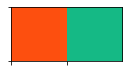

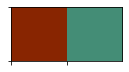

In [0]:
color0 = '#FD4F0F'
color1 = '#15B985'
colordark0 = '#882501'
colordark1 = '#448D76'

colors =[color0,color1]
colorsdark = [colordark0 ,colordark1 ]
sns.palplot(sns.color_palette(colors))
sns.palplot(sns.color_palette(colorsdark))

# SVM

In [0]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, recall_score, precision_score
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [0]:
scaler = StandardScaler()
df_scaled_num = pd.DataFrame(scaler.fit_transform(df[['Temperature', 'Humidity', 'Light', 'CO2']]),columns = df[['Temperature', 'Humidity', 'Light', 'CO2']].columns)
df_scaled = pd.concat([df_scaled_num,df[['Disagio','Grande disagio','Pericolo','Occupancy']]], axis=1)
df_scaled.head()

,Temperature,Humidity,Light,CO2,Disagio,Grande disagio,Pericolo,Occupancy
0,2.518470,0.278526,1.573763,0.364948,0,0,1,1
1,2.488967,0.277713,1.591735,0.341881,0,0,1,1
2,2.488967,0.273645,1.573763,0.340290,0,0,1,1
3,2.488967,0.265508,1.573763,0.323587,0,0,1,1
4,2.439796,0.265508,1.573763,0.311655,0,0,1,1


In [0]:
df_scaled_num_test1 = pd.DataFrame(scaler.fit_transform(df_test1[['Temperature', 'Humidity', 'Light', 'CO2']]),columns = df_test1[['Temperature', 'Humidity', 'Light', 'CO2']].columns)
df_scaled_test1 = pd.concat([df_scaled_num_test1,df_test1[['Disagio','Grande disagio','Pericolo','Occupancy']]], axis=1)
df_scaled_test1.head()


,Temperature,Humidity,Light,CO2,Disagio,Grande disagio,Pericolo,Occupancy
0,2.204762,0.376814,1.566862,0.106940,0,0,1,1
1,2.222275,0.384202,1.539680,0.145214,0,0,1,1
2,2.233950,0.359575,1.516762,0.176881,0,0,1,1
3,2.226653,0.316478,1.201302,0.194253,0,0,1,1
4,2.257300,0.347262,1.180715,0.208776,0,0,1,1


In [0]:
attributes = [col for col in df_scaled.columns if col != 'Occupancy']
X_train_svm = df_scaled[attributes].values
y_train_svm = df_scaled['Occupancy']

X_test_svm = df_scaled_test1[attributes].values
y_test_svm = df_scaled_test1['Occupancy']

## Linear

In [0]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
n_jobs = -1
svc = svm.SVC(kernel = 'linear')
clf = GridSearchCV(svc, parameters, cv=5, scoring = 'accuracy')
clf.fit(X_train_svm, y_train_svm)
SVM_l = clf.best_estimator_
SVM_l

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
SVM_l.fit(X_train_svm, y_train_svm)

y_pred = SVM_l.predict(X_test_svm)

print('Accuracy %s' % accuracy_score(y_test_svm, y_pred))
print('F1-score %s' % f1_score(y_test_svm, y_pred, average=None))
print(classification_report(y_test_svm, y_pred))

Accuracy 0.9200750469043152
F1-score [0.94005066 0.88013506]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1693
           1       0.97      0.80      0.88       972

    accuracy                           0.92      2665
   macro avg       0.93      0.90      0.91      2665
weighted avg       0.92      0.92      0.92      2665



## Sigmoid

In [0]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
n_jobs = -1
svc = svm.SVC(kernel = 'sigmoid')
clf = GridSearchCV(svc, parameters, cv=5, scoring = 'accuracy')
clf.fit(X_train_svm, y_train_svm)
SVM_s = clf.best_estimator_
SVM_s

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
SVM_s.fit(X_train_svm, y_train_svm)

y_pred = SVM_l.predict(X_test_svm)

print('Accuracy %s' % accuracy_score(y_test_svm, y_pred))
print('F1-score %s' % f1_score(y_test_svm, y_pred, average=None))
print(classification_report(y_test_svm, y_pred))

Accuracy 0.9200750469043152
F1-score [0.94005066 0.88013506]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1693
           1       0.97      0.80      0.88       972

    accuracy                           0.92      2665
   macro avg       0.93      0.90      0.91      2665
weighted avg       0.92      0.92      0.92      2665



## Poly

In [0]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']
              }
n_jobs = -1
svc = svm.SVC(kernel = 'poly')
clf = GridSearchCV(svc, parameters, cv=5, scoring = 'accuracy')
clf.fit(X_train_svm, y_train_svm)
SVM_p = clf.best_estimator_
SVM_p

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
SVM_p.fit(X_train_svm, y_train_svm)

y_pred = SVM_p.predict(X_test_svm)

print('Accuracy %s' % accuracy_score(y_test_svm, y_pred))
print('F1-score %s' % f1_score(y_test_svm, y_pred, average=None))
print(classification_report(y_test_svm, y_pred))

Accuracy 0.9527204502814259
F1-score [0.96354167 0.93276414]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1693
           1       0.97      0.90      0.93       972

    accuracy                           0.95      2665
   macro avg       0.96      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



## Rbf

In [0]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
n_jobs = -1
svc = svm.SVC(kernel = 'rbf')
clf = GridSearchCV(svc, parameters, cv=5, scoring = 'accuracy')
clf.fit(X_train_svm, y_train_svm)
SVM_r = clf.best_estimator_
SVM_r

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
SVM_r.fit(X_train_svm, y_train_svm)

y_pred = SVM_r.predict(X_test_svm)

print('Accuracy %s' % accuracy_score(y_test_svm, y_pred))
print('F1-score %s' % f1_score(y_test_svm, y_pred, average=None))
print(classification_report(y_test_svm, y_pred))

Accuracy 0.9208255159474672
F1-score [0.94064698 0.88112676]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1693
           1       0.97      0.80      0.88       972

    accuracy                           0.92      2665
   macro avg       0.94      0.90      0.91      2665
weighted avg       0.93      0.92      0.92      2665



## Decision Function

In [0]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [0]:
decision_function = SVM_p.decision_function(X_train_svm)
support_vector_indices = np.where((2 * y_train_svm - 1) * decision_function <= 1)[0]
support_vectors = X_train_svm[support_vector_indices]
pca = PCA(n_components=2)
pca.fit(X_train_svm)
X_pca = pca.transform(X_train_svm)
support_vectors_pca = pca.transform(support_vectors)

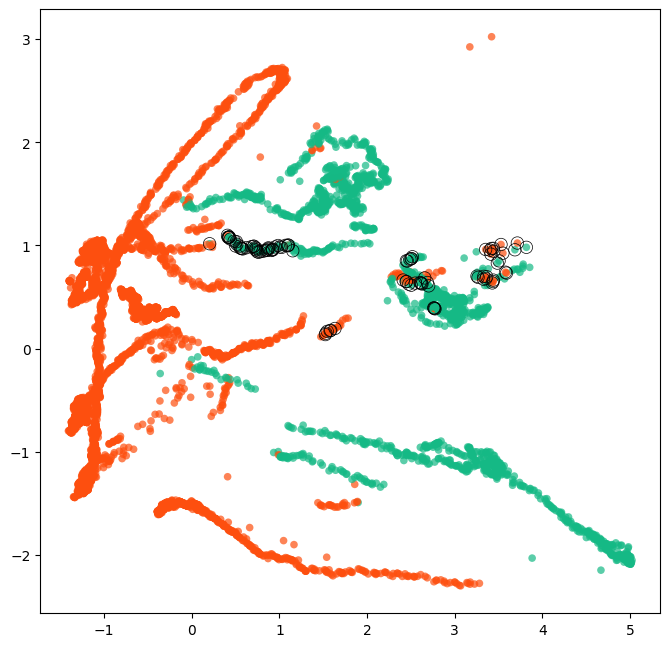

In [0]:
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_svm, cmap=ListedColormap([color0, color1]),edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=80,
                linewidth=0.5, facecolors='none', edgecolors='k')

plt.show()

## Effect of Different Kernels

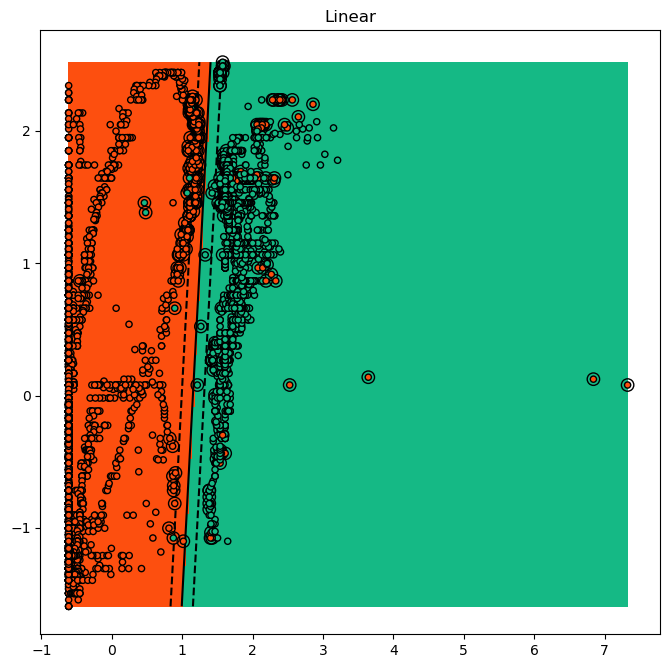

In [0]:
from matplotlib.colors import ListedColormap

X = df_scaled[['Light','Temperature']].values
y = df_scaled['Occupancy']
X_test = df_scaled_test1[['Light','Temperature']].values
y_test = df_test1['Occupancy']

n_sample = len(X)


# fit the model
SVM_l.fit(X, y)
    
decision_function = SVM_l.decision_function(X)
support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]

plt.figure(figsize =(8,8),dpi=100)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=ListedColormap([color0, color1]),
                edgecolor='k', s=20)

# Circle out the test data
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none',
                zorder=5, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = SVM_l.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=ListedColormap([color0, color1]))
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.title('Linear')
plt.show()

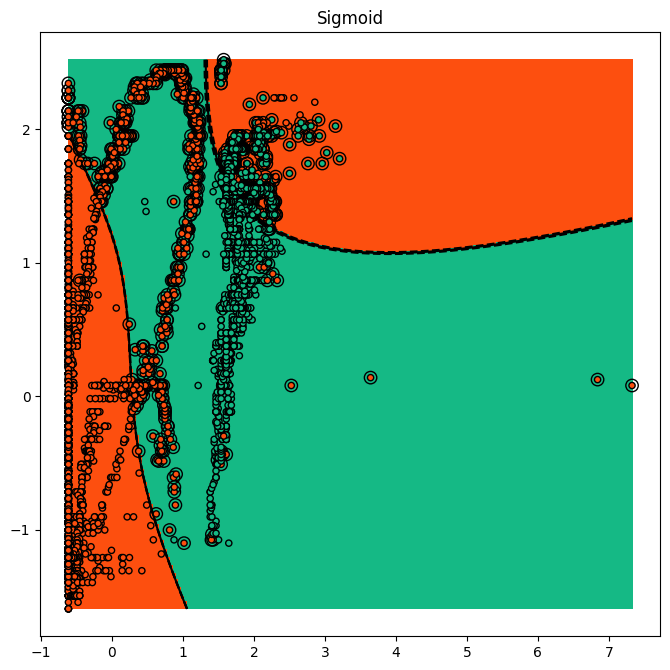

In [0]:
SVM_s.fit(X, y)

decision_function = SVM_s.decision_function(X)
support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]

plt.figure(figsize =(8,8),dpi=100)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=ListedColormap([color0, color1]),
                edgecolor='k', s=20)

# Circle out the test data
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none',
                zorder=5, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = SVM_s.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=ListedColormap([color0, color1]))
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.title('Sigmoid')
plt.show()

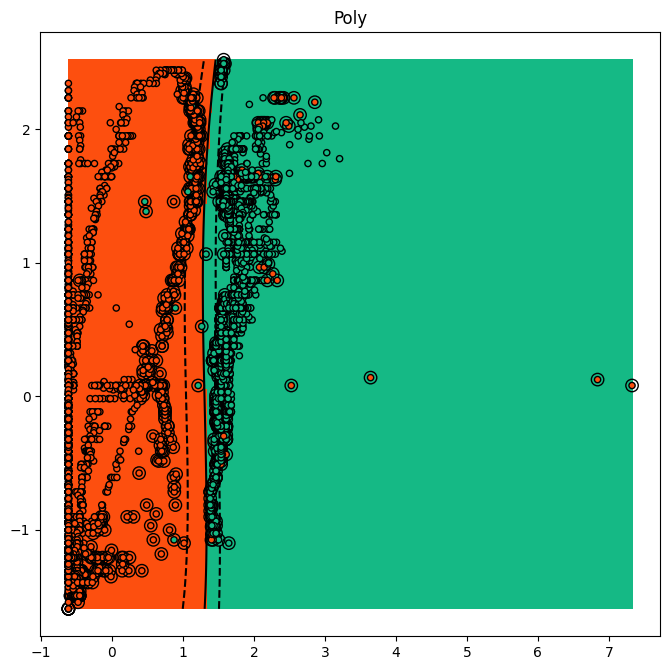

In [0]:
SVM_p.fit(X, y)

decision_function = SVM_p.decision_function(X)
support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]

plt.figure(figsize =(8,8),dpi=100)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=ListedColormap([color0, color1]),
                edgecolor='k', s=20)

# Circle out the test data
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none',
                zorder=5, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = SVM_p.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=ListedColormap([color0, color1]))
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.title('Poly')
plt.show()

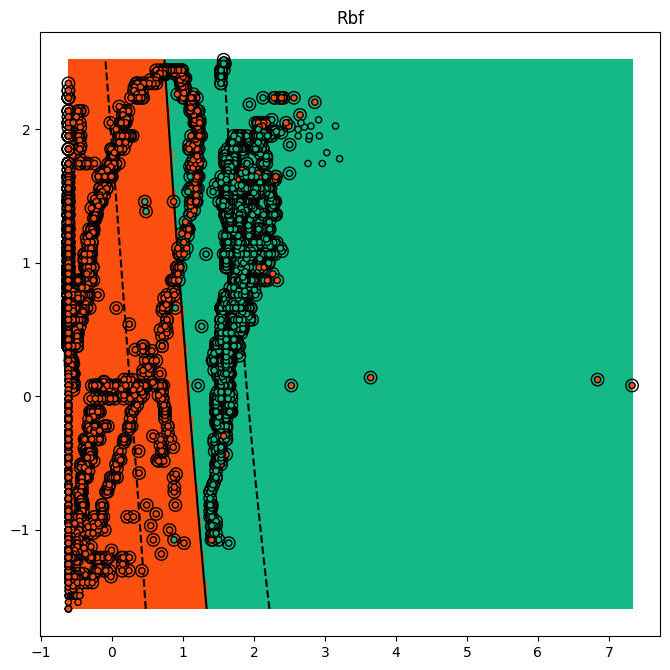

In [0]:
SVM_r.fit(X, y)

decision_function = SVM_r.decision_function(X)
support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]

plt.figure(figsize =(8,8),dpi=100)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=ListedColormap([color0, color1]),
                edgecolor='k', s=20)

# Circle out the test data
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none',
                zorder=5, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = SVM_r.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=ListedColormap([color0, color1]))
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.title('Rbf')
plt.show()

# PCA & SVM

In [0]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import make_pipeline

In [0]:
attributes = [col for col in df_scaled.columns if col != 'Occupancy']
X_train_svm = df_scaled[attributes].values
y_train_svm = df_scaled['Occupancy']

X_test_svm = df_scaled_test1[attributes].values
y_test_svm = df_scaled_test1['Occupancy']

attributes

['Temperature',
 'Humidity',
 'Light',
 'CO2',
 'Disagio',
 'Grande disagio',
 'Pericolo']

## Linear

Nella classificazione SVM, la PCA dà risultati peggiori. La riduzione a due soli componenti (vettori) implica una perdita di informazione per cui i modelli non lineari vengono penalizzati. Le componenti principali sono combinazioni lineari degli attributi, per cui risulta difficile modellarle utilizzando altre tipologie di kernel
perchè è la combinazine lineare 

In [0]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
svc = svm.SVC(kernel = 'linear')

In [0]:
clf = make_pipeline(PCA(n_components=2), GridSearchCV(svc, parameters, cv=5, scoring = 'accuracy'))
clf.fit(X_train_svm, y_train_svm)
pred_test = clf.predict(X_test_svm)

In [0]:
print('\nPrediction accuracy for the test dataset with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test_svm, pred_test)))


Prediction accuracy for the test dataset with PCA
89.79%



In [0]:
SVM_l_pca = clf[1].best_estimator_
SVM_l_pca

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Sigmoid

In [0]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
svc = svm.SVC(kernel = 'sigmoid')

In [0]:
clf = make_pipeline(KernelPCA(kernel = 'sigmoid', n_components=2), GridSearchCV(svc, parameters, cv=5, scoring = 'accuracy'))
clf.fit(X_train_svm, y_train_svm)
pred_test = clf.predict(X_test_svm)

In [0]:
print('\nPrediction accuracy for the test dataset with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test_svm, pred_test)))


Prediction accuracy for the test dataset with PCA
89.38%



In [0]:
SVM_s_pca = clf[1].best_estimator_
SVM_s_pca

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Poly

In [0]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
svc = svm.SVC(kernel = 'poly')

In [0]:
clf = make_pipeline(KernelPCA(kernel = 'poly', n_components=2), GridSearchCV(svc, parameters, cv=5, scoring = 'accuracy'))
clf.fit(X_train_svm, y_train_svm)
pred_test = clf.predict(X_test_svm)

In [0]:
print('\nPrediction accuracy for the test dataset with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test_svm, pred_test)))


Prediction accuracy for the test dataset with PCA
78.16%



In [0]:
SVM_p_pca = clf[1].best_estimator_
SVM_p_pca

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Rbf

In [0]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
svc = svm.SVC(kernel = 'rbf')

In [0]:
clf = make_pipeline(KernelPCA(kernel = 'rbf', n_components=2),  GridSearchCV(svc, parameters, cv=5, scoring = 'accuracy'))
clf.fit(X_train_svm, y_train_svm)
pred_test = clf.predict(X_test_svm)

In [0]:
print('\nPrediction accuracy for the test dataset with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test_svm, pred_test)))


Prediction accuracy for the test dataset with PCA
90.17%



In [0]:
SVM_r_pca = clf[1].best_estimator_
SVM_r_pca

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pca = PCA(n_components=2)
pca.fit(X_train_svm)
X_pca = pca.transform(X_train_svm)

In [0]:
pca = PCA(n_components=2)
pca.fit(X_test_svm)
X_pca_test = pca.transform(X_test_svm)

## Rbf Kernel

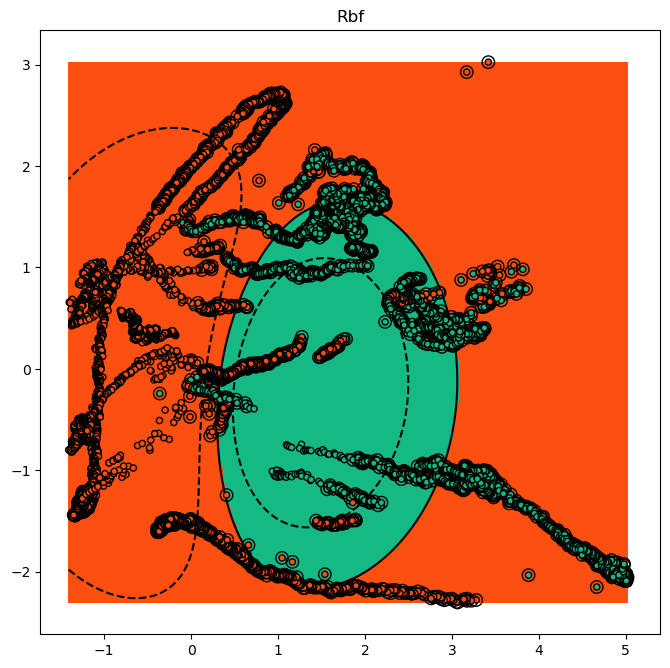

In [0]:
from matplotlib.colors import ListedColormap

X = X_pca
y = df_scaled['Occupancy']
X_test = X_pca_test
y_test = df_test1['Occupancy']

n_sample = len(X)


# fit the model
SVM_r_pca.fit(X, y)
    
decision_function = SVM_r.decision_function(X)
support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]

plt.figure(figsize =(8,8),dpi=100)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=ListedColormap([color0, color1]),
                edgecolor='k', s=20)

# Circle out the test data
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none',
                zorder=5, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = SVM_r.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=ListedColormap([color0, color1]))
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.title('Rbf')
plt.show()

# RandomForest

In [0]:
attributes = [col for col in df.columns if col != 'Occupancy']
X_train = df[attributes].values
y_train = df['Occupancy']

X_test = df_test1[attributes].values
y_test = df_test1['Occupancy']

attributes

['Temperature',
 'Humidity',
 'Light',
 'CO2',
 'day',
 'hour',
 'Disagio',
 'Grande disagio',
 'Pericolo']

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {"n_estimators": [1, 2, 5, 10, 20, 30, 40, 50, 55, 100],
              "max_depth": [1, 4, 6, 8, 10],
              "criterion":['gini', 'entropy'],
              "min_samples_split":[2,4,5,10,20,50],
              "min_samples_leaf":[1,2,4,5,10,20,35,50]
             }

# run grid search
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [0]:
Randf = grid.best_estimator_
Randf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
Randf.fit(X_train, y_train)

y_pred = Randf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9587242026266416
F1-score [0.96770405 0.94282744]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1693
           1       0.95      0.93      0.94       972

    accuracy                           0.96      2665
   macro avg       0.96      0.95      0.96      2665
weighted avg       0.96      0.96      0.96      2665



In [0]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9532737682882069


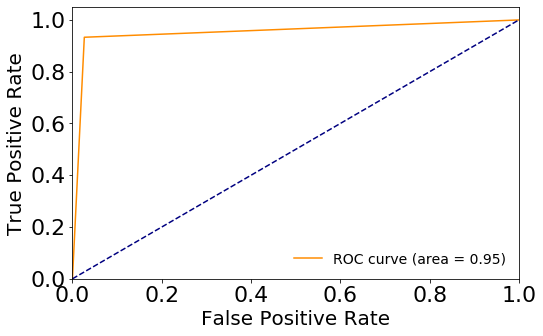

In [0]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [0]:
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz

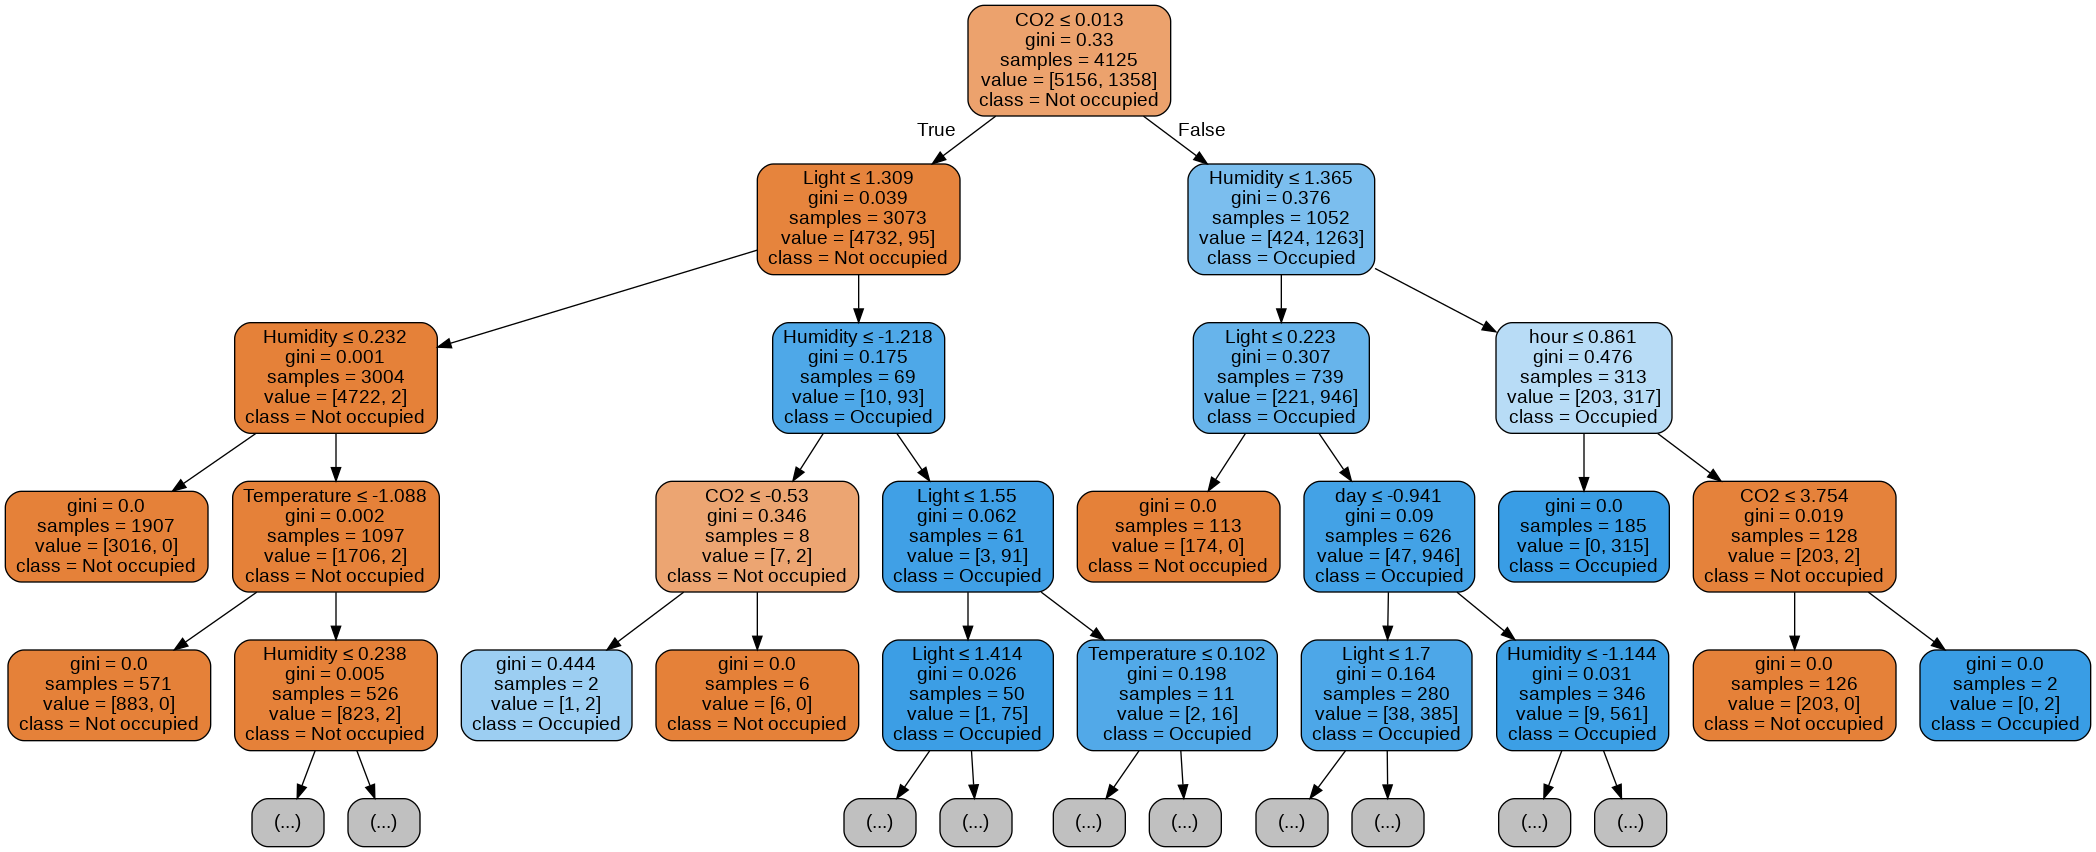

In [0]:
dot_data = tree.export_graphviz(Randf.estimators_[0], out_file=None,  
                                feature_names=attributes, 
                                class_names=['Occupied' if x == 1 else 'Not occupied' for x in Randf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

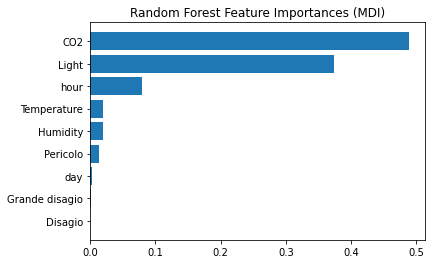

In [0]:
nbr_features = 9

tree_feature_importances = Randf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(attributes)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

# AdaBoost

## Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

param_grid = {"n_estimators": [1, 2, 5, 10, 20, 30, 40, 50, 55, 100],
              "learning_rate": [0.01, 0.05, 0.1, .5, 1.0],
              "algorithm":['SAMME.R', 'SAMME']
             }

# run grid search
grid = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None,
                       splitter='best')),cv = 5, param_grid=param_grid, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight='balanced',
                                                                                criterion='entropy',
                                                                                max_depth=4,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_lea

In [0]:
Boost_tree= grid.best_estimator_
Boost_tree

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=50,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                  

In [0]:
Boost_tree.fit(X_train, y_train)

y_pred = Boost_tree.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98288802 0.97148574]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



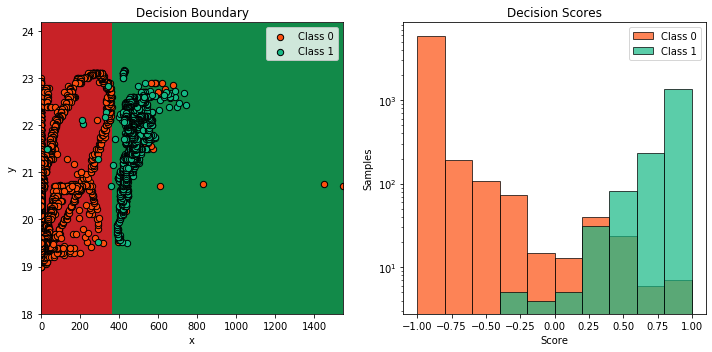

In [0]:
from sklearn.datasets import make_gaussian_quantiles

# Create and fit an AdaBoosted decision tree
X = df[['Light','Temperature']].values
y = df['Occupancy']

Boost_tree.fit(X, y)

plot_colors = (color0,color1)
plot_step = 0.02
class_names = "01"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = Boost_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap= plt.cm.RdYlGn)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c= c, cmap=plt.cm.RdYlGn,
                s=40, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = Boost_tree.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=0.7,
             edgecolor='k')
plt.yscale('log')
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

## Random Forest

In [0]:
param_grid = {"n_estimators": [1, 2, 5, 10, 20, 30, 40, 50, 55, 100],
              "learning_rate": [0.01, 0.05, 0.1, .5, 1.0],
              "algorithm":['SAMME.R', 'SAMME']
             }

# run grid search
grid = GridSearchCV(AdaBoostClassifier(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)),cv = 5, param_grid=param_grid, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=8,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                max_samples=None,
                                                                                min_impurity_decrease=0.0,
             

In [0]:
Boost_rand= grid.best_estimator_
Boost_rand

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_samples_split=2,
                                          

In [0]:
Boost_rand.fit(X_train, y_train)

y_pred = Boost_rand.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9553470919324578
F1-score [0.96503086 0.93824598]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1693
           1       0.95      0.93      0.94       972

    accuracy                           0.96      2665
   macro avg       0.95      0.95      0.95      2665
weighted avg       0.96      0.96      0.96      2665



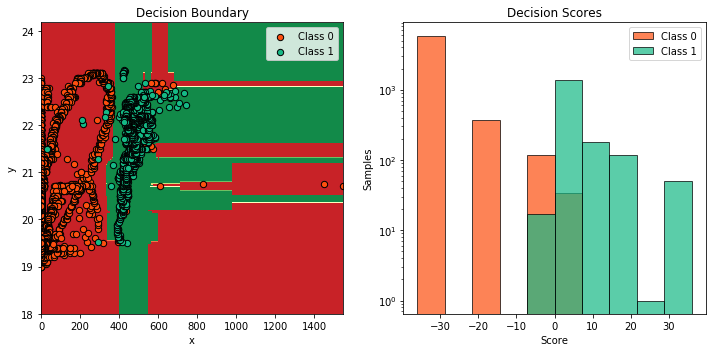

In [0]:
from sklearn.datasets import make_gaussian_quantiles

# Create and fit an AdaBoosted decision tree
X = df[['Light','Temperature']].values
y = df['Occupancy']

Boost_rand.fit(X, y)

plot_colors = (color0,color1)
plot_step = 0.02
class_names = "01"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = Boost_rand.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap= plt.cm.RdYlGn)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c= c, cmap=plt.cm.RdYlGn,
                s=40, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = Boost_rand.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=0.7,
             edgecolor='k')
plt.yscale('log')
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

# Bagging

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [0]:
param_grid = {"n_estimators": [1, 2, 5, 10, 20, 30, 40, 50, 55, 100],
              "max_samples": [1, 10, 20, 50, 100,200,300,400,500,800,1000],
              "max_features":[1,2,3,4,5,6,7,8,9]
             }

# run grid search
grid = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None,
                       splitter='best')),cv = 5, param_grid=param_grid, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight='balanced',
                                                                               criterion='entropy',
                                                                               max_depth=4,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=50,
                                                                  

In [0]:
Bagg= grid.best_estimator_
Bagg

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight='balanced',
                                                        criterion='entropy',
                                                        max_depth=4,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=50,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state

In [0]:
Bagg.fit(X_train, y_train)

y_pred = Bagg.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9782363977485928
F1-score [0.98262433 0.97088353]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



# NN

## Normalization

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Single Perceptron

In [0]:
from sklearn.linear_model import Perceptron

In [0]:
ppn = Perceptron(max_iter=150, tol=0.001, eta0=0.01, random_state=0)

In [0]:
ppn.fit(X_train, y_train)

In [0]:
y_pred = ppn.predict(X_test)

In [0]:
print(accuracy_score(y_test, y_pred))

## Sklearn Multilayer Perceptron

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
clf = MLPClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9467166979362102
F1-score [0.95788849 0.92747702]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1693
           1       0.92      0.93      0.93       972

    accuracy                           0.95      2665
   macro avg       0.94      0.94      0.94      2665
weighted avg       0.95      0.95      0.95      2665



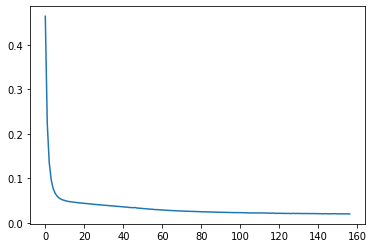

In [0]:
plt.plot(clf.loss_curve_)
plt.show()

### Activation: TANH

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='tanh', early_stopping=False, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9347091932457786
F1-score [0.94821429 0.91167513]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1693
           1       0.90      0.92      0.91       972

    accuracy                           0.93      2665
   macro avg       0.93      0.93      0.93      2665
weighted avg       0.94      0.93      0.93      2665



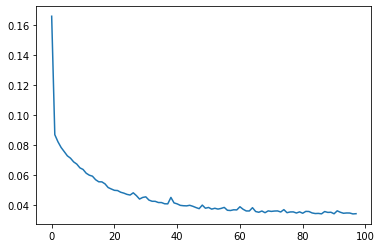

In [0]:
plt.plot(clf.loss_curve_)
plt.show()

### Activation:'identify'

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='identity', early_stopping=False, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



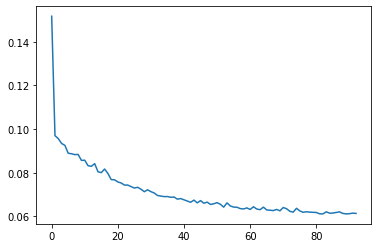

In [0]:
plt.plot(clf.loss_curve_)
plt.show()

### Activation: 'logistic'

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='logistic', early_stopping=False, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98289829 0.97145719]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



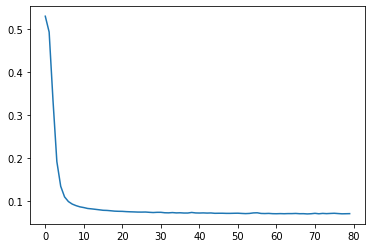

In [0]:
plt.plot(clf.loss_curve_)
plt.show()

### Activation: 'relu'

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='relu', early_stopping=False, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9418386491557224
F1-score [0.95492876 0.91803279]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1693
           1       0.94      0.89      0.92       972

    accuracy                           0.94      2665
   macro avg       0.94      0.93      0.94      2665
weighted avg       0.94      0.94      0.94      2665



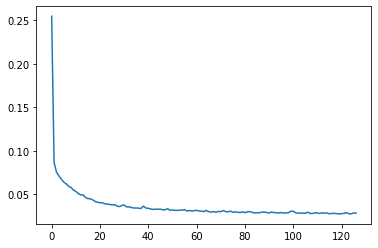

In [0]:
plt.plot(clf.loss_curve_)
plt.show()

Il multilayer Percepton migliore è il classificatore con activation: Logistic/Identify


## Keras Deep Neural Networks


In [0]:
from sklearn.model_selection import train_test_split, cross_val_score 

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=0)

In [0]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential


In [0]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [0]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, epochs=100, batch_size=10).history



Epoch 1/100
652/652 [==============================] - 1s 1ms/step - loss: 0.0673 - accuracy: 0.9834
Epoch 2/100
652/652 [==============================] - 1s 1ms/step - loss: 0.0385 - accuracy: 0.9879
Epoch 3/100
652/652 [==============================] - 1s 1ms/step - loss: 0.0342 - accuracy: 0.9876
Epoch 4/100
652/652 [==============================] - 1s 1ms/step - loss: 0.0312 - accuracy: 0.9888
Epoch 5/100
652/652 [==============================] - 1s 1ms/step - loss: 0.0287 - accuracy: 0.9914
Epoch 6/100
652/652 [==============================] - 1s 1ms/step - loss: 0.0282 - accuracy: 0.9908
Epoch 7/100
652/652 [==============================] - 1s 1ms/step - loss: 0.0233 - accuracy: 0.9919
Epoch 8/100
652/652 [==============================] - 1s 1ms/step - loss: 0.0243 - accuracy: 0.9922
Epoch 9/100
652/652 [==============================] - 1s 1ms/step - loss: 0.0249 - accuracy: 0.9923
Epoch 10/100
652/652 [==============================] - 1s 1ms/step - loss: 0.0216 - accura

In [0]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, epochs=100, batch_size=50).history

Epoch 1/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1397 - accuracy: 0.9679
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 0.9879
Epoch 3/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9876
Epoch 4/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0366 - accuracy: 0.9883
Epoch 5/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.9880
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 0.9879
Epoch 7/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0309 - accuracy: 0.9882
Epoch 8/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9897
Epoch 9/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 0.9899
Epoch 10/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0247 - accura

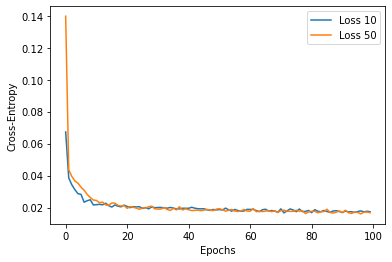

In [0]:
plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 50')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [0]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

84/84 [==============================] - 0s 1ms/step - loss: 0.2540 - accuracy: 0.9302
Loss 0.234624, Accuracy 0.942589
Loss 0.253963, Accuracy 0.930206


In [0]:
y_pred = model1.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6585365853658537
F1-score [0.78817505 0.11992263]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1693
           1       1.00      0.06      0.12       972

    accuracy                           0.66      2665
   macro avg       0.83      0.53      0.45      2665
weighted avg       0.78      0.66      0.54      2665



In [0]:
model3 = build_model()

history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, batch_size=10).history

Epoch 1/1000
652/652 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9800 - val_loss: 0.0419 - val_accuracy: 0.9902
Epoch 2/1000
652/652 [==============================] - 1s 2ms/step - loss: 0.0373 - accuracy: 0.9871 - val_loss: 0.0383 - val_accuracy: 0.9896
Epoch 3/1000
652/652 [==============================] - 1s 2ms/step - loss: 0.0324 - accuracy: 0.9876 - val_loss: 0.0328 - val_accuracy: 0.9896
Epoch 4/1000
652/652 [==============================] - 1s 2ms/step - loss: 0.0294 - accuracy: 0.9896 - val_loss: 0.0320 - val_accuracy: 0.9883
Epoch 5/1000
652/652 [==============================] - 1s 2ms/step - loss: 0.0266 - accuracy: 0.9911 - val_loss: 0.0291 - val_accuracy: 0.9902
Epoch 6/1000
652/652 [==============================] - 1s 2ms/step - loss: 0.0256 - accuracy: 0.9905 - val_loss: 0.0265 - val_accuracy: 0.9902
Epoch 7/1000
652/652 [==============================] - 1s 2ms/step - loss: 0.0235 - accuracy: 0.9912 - val_loss: 0.0346 - val_accuracy:

In [0]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))

84/84 [==============================] - 0s 1ms/step - loss: 0.9895 - accuracy: 0.9516
Loss 0.234624, Accuracy 0.942589
Loss 0.253963, Accuracy 0.930206
Loss 0.989468, Accuracy 0.951595


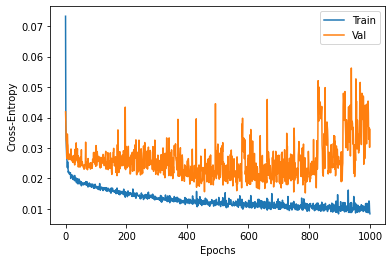

In [0]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

Il Dataset è stato splittato in training set e validation set, con rispettive percentuali del 80% e 20%; Abbiamo 6514 records nel training set e 1629 records nel validation set.

## Early Stopping

In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, 
                      batch_size=10, callbacks=[es,mc]).history

Epoch 1/150
652/652 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9787 - val_loss: 0.0496 - val_accuracy: 0.9877
Epoch 2/150
652/652 [==============================] - 1s 2ms/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 0.0399 - val_accuracy: 0.9890
Epoch 3/150
652/652 [==============================] - 1s 2ms/step - loss: 0.0347 - accuracy: 0.9868 - val_loss: 0.0320 - val_accuracy: 0.9902
Epoch 4/150
652/652 [==============================] - 1s 2ms/step - loss: 0.0313 - accuracy: 0.9885 - val_loss: 0.0292 - val_accuracy: 0.9902
Epoch 5/150
652/652 [==============================] - 1s 2ms/step - loss: 0.0262 - accuracy: 0.9909 - val_loss: 0.0327 - val_accuracy: 0.9908
Epoch 6/150
652/652 [==============================] - 1s 2ms/step - loss: 0.0251 - accuracy: 0.9903 - val_loss: 0.0309 - val_accuracy: 0.9926
Epoch 7/150
652/652 [==============================] - 1s 2ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.0293 - val_accuracy: 0.9896

In [0]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

84/84 [==============================] - 0s 1ms/step - loss: 0.2639 - accuracy: 0.9396
Loss 0.234624, Accuracy 0.942589
Loss 0.253963, Accuracy 0.930206
Loss 0.989468, Accuracy 0.951595
Loss 0.263912, Accuracy 0.939587


## L2 Regularization 

In [0]:
from tensorflow.keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [0]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, 
                    batch_size=10, callbacks=[es,mc]).history

Epoch 1/150
652/652 [==============================] - 2s 2ms/step - loss: 3.4821 - accuracy: 0.7906 - val_loss: 3.4551 - val_accuracy: 0.7759
Epoch 2/150
652/652 [==============================] - 1s 2ms/step - loss: 3.2269 - accuracy: 0.7906 - val_loss: 3.4551 - val_accuracy: 0.7759
Epoch 3/150
652/652 [==============================] - 1s 2ms/step - loss: 3.2269 - accuracy: 0.7906 - val_loss: 3.4551 - val_accuracy: 0.7759
Epoch 4/150
652/652 [==============================] - 1s 2ms/step - loss: 3.2305 - accuracy: 0.7906 - val_loss: 3.4551 - val_accuracy: 0.7759
Epoch 5/150
652/652 [==============================] - 1s 2ms/step - loss: 3.2269 - accuracy: 0.7906 - val_loss: 3.4551 - val_accuracy: 0.7759
Epoch 6/150
652/652 [==============================] - 1s 2ms/step - loss: 3.2305 - accuracy: 0.7906 - val_loss: 3.4551 - val_accuracy: 0.7759
Epoch 7/150
652/652 [==============================] - 1s 2ms/step - loss: 3.2305 - accuracy: 0.7906 - val_loss: 3.4551 - val_accuracy: 0.7759

##Drop-Out

In [0]:
from tensorflow.keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [0]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                              epochs=150, batch_size=10, callbacks=[es,mc]).history

Epoch 1/150
652/652 [==============================] - 1s 2ms/step - loss: 0.2369 - accuracy: 0.9704 - val_loss: 0.1423 - val_accuracy: 0.9902
Epoch 2/150
652/652 [==============================] - 1s 2ms/step - loss: 0.1609 - accuracy: 0.9865 - val_loss: 0.1510 - val_accuracy: 0.9896
Epoch 3/150
652/652 [==============================] - 1s 2ms/step - loss: 0.1741 - accuracy: 0.9873 - val_loss: 0.1417 - val_accuracy: 0.9902
Epoch 4/150
652/652 [==============================] - 1s 2ms/step - loss: 0.1794 - accuracy: 0.9876 - val_loss: 0.1497 - val_accuracy: 0.9902
Epoch 5/150
652/652 [==============================] - 1s 2ms/step - loss: 0.1780 - accuracy: 0.9883 - val_loss: 0.1499 - val_accuracy: 0.9902
Epoch 6/150
652/652 [==============================] - 1s 2ms/step - loss: 0.1764 - accuracy: 0.9882 - val_loss: 0.1590 - val_accuracy: 0.9896
Epoch 7/150
652/652 [==============================] - 1s 2ms/step - loss: 0.1860 - accuracy: 0.9873 - val_loss: 0.3097 - val_accuracy: 0.9791

In [0]:
from tensorflow.keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

84/84 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.9711


In [0]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Loss 0.224719, Accuracy 0.955722
Loss 5.709756, Accuracy 0.635272
Loss 0.380418, Accuracy 0.971107


## Hyper-Parameter Tuning

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [0]:
def build_model(n_layers=2, h_dim=64, activation='relu', optimizer='adam'):
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    
    model.add(Dense(h_dim, activation=activation, input_shape=(n_feature,)))
    for i in range(n_layers-1):
        model.add(Dense(h_dim, activation=activation))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [0]:
n_layers = [1, 2, 3]
h_dim = [32, 64, 128]
activation = ['relu', 'linear','sigmoid','tanh']
optimizer = ['adagrad', 'adam']
params = dict(optimizer=optimizer, n_layers=n_layers, h_dim=h_dim, activation=activation)

In [0]:
model = KerasRegressor(build_fn=build_model)

rnd = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)
rnd_result = rnd.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)

68/68 [==============================] - 0s 1ms/step - loss: 0.1963 - accuracy: 0.9871


In [0]:
print("Best: %f using %s" % (-rnd_result.best_score_, rnd_result.best_params_))
means = rnd_result.cv_results_['mean_test_score']
stds = rnd_result.cv_results_['std_test_score']
params = rnd_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: 0.101903 using {'optimizer': 'adagrad', 'n_layers': 2, 'h_dim': 64, 'activation': 'tanh'}
0.178518 (0.042088) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 128, 'activation': 'tanh'}
2.215956 (1.489443) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 64, 'activation': 'sigmoid'}
0.101903 (0.053894) with: {'optimizer': 'adagrad', 'n_layers': 2, 'h_dim': 64, 'activation': 'tanh'}
1.979648 (1.414821) with: {'optimizer': 'adam', 'n_layers': 3, 'h_dim': 128, 'activation': 'tanh'}
0.178030 (0.041624) with: {'optimizer': 'adam', 'n_layers': 2, 'h_dim': 64, 'activation': 'tanh'}


In [0]:
clf = rnd_result.best_estimator_.model

loss, acc = clf.evaluate(X_test, y_test)
print('Loss %f, Accuracy %f' % (loss, acc))

# Evaluation of classifiers

## SVM

In [0]:
y_pred = SVM_p.predict(X_test_svm)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9527204502814259
F1-score [0.96354167 0.93276414]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1693
           1       0.97      0.90      0.93       972

    accuracy                           0.95      2665
   macro avg       0.96      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



In [0]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9413191330071293


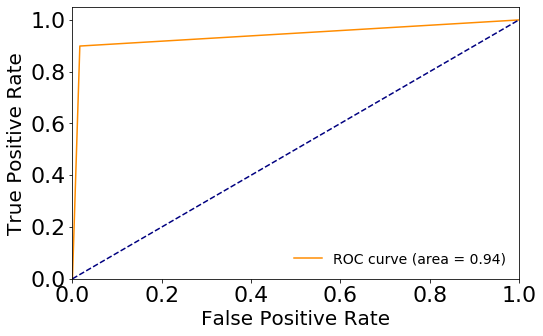

In [0]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [0]:
import scikitplot as skplt

# Deriving Class probabilities
predicted_probabilities = SVM_p.predict_proba(X_test)

# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

AttributeError: predict_proba is not available when  probability=False

In [0]:
df_test1['Occupancy'].value_counts()/df_test1['Occupancy'].count()

NameError: name 'df_test1' is not defined

## AdaBoost

In [0]:
y_pred = Boost_tree.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98288802 0.97148574]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [0]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9829469079895672


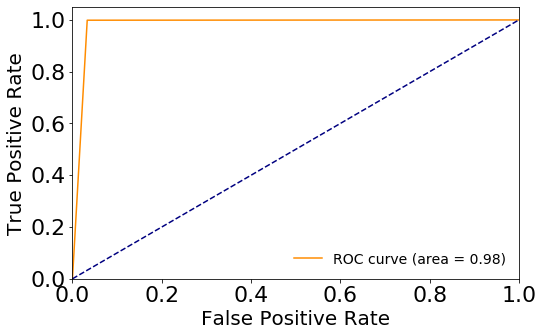

In [0]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()